# Challenge Data Mauna Kea
Data exploration

In [1]:
import numpy as np
import pandas as pd
import os
from skimage.measure import compare_ssim
import random
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
train_df = pd.read_csv("../data/raw/TrainingSet_20aimVO.csv")

In [3]:
train_df

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0
5,im_1_0.png,0
6,im_13_0.png,0
7,im_0_0.png,0
8,im_19_0.png,0
9,im_24_0.png,0


## Classes are imbalanced:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D6D47EB70>]],
      dtype=object)

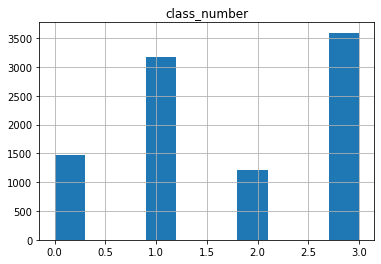

In [4]:
train_df.hist()

## Image sizes:

In [5]:
img_dir = "../data/raw/TrainingSetImagesDir"
img_sizes = []
for img_name in random.sample(os.listdir(img_dir), k=1000):
    img = Image.open(os.path.join(img_dir, img_name))
    img = np.array(img)
    img_sizes.append(img.shape)

In [6]:
img_sizes = np.array(img_sizes)[:, :2]
print(img_sizes.mean(axis=0))
print(img_sizes.std(axis=0))

[519. 521.]
[0. 0.]


## Plot samples:

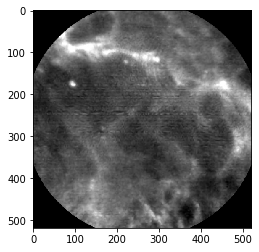

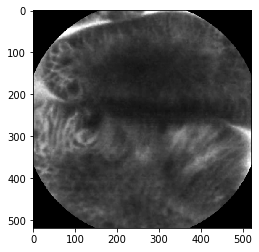

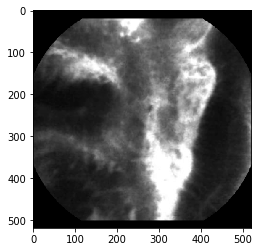

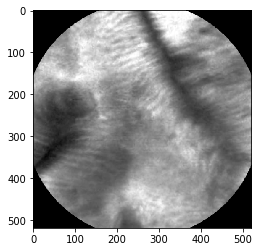

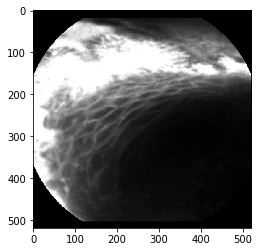

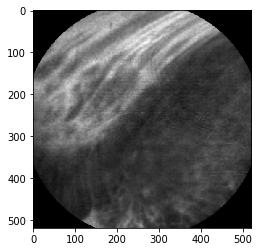

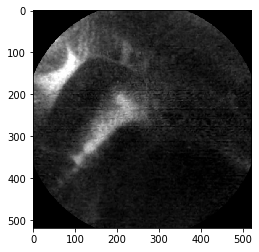

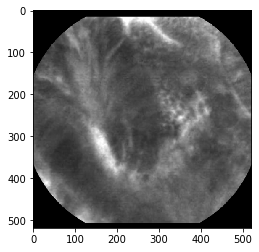

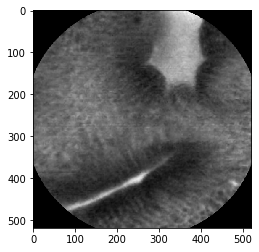

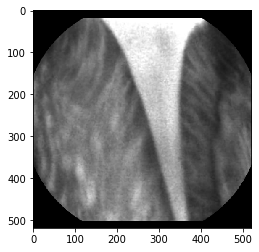

<Figure size 432x288 with 0 Axes>

In [7]:
for img_name in random.sample(os.listdir(img_dir), k=10):
    img = Image.open(os.path.join(img_dir, img_name))
    img = np.array(img)
    plt.imshow(img)
    plt.figure()
plt.show()

Few images are almost completely white:

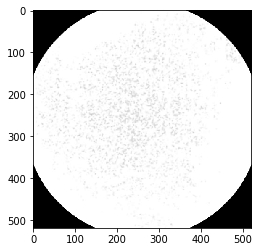

In [8]:
img = Image.open(os.path.join(img_dir, "im_11_44.png"))
img = np.array(img)
plt.imshow(img)

## Analyze classes per patient

In [9]:
def get_patient_nb(row):
    img_name = row.image_filename
    start = img_name.rfind("_")
    return int(img_name[start+1:-4])
train_df["patient_id"] = train_df.apply(get_patient_nb, axis=1)
train_df

,image_filename,class_number,patient_id
0,im_4_0.png,0,0
1,im_21_0.png,0,0
2,im_9_0.png,0,0
3,im_8_0.png,0,0
4,im_15_0.png,0,0
5,im_1_0.png,0,0
6,im_13_0.png,0,0
7,im_0_0.png,0,0
8,im_19_0.png,0,0
9,im_24_0.png,0,0


In [10]:
train_df['0'] = train_df.class_number == 0
train_df['1'] = train_df.class_number == 1
train_df['2'] = train_df.class_number == 2
train_df['3'] = train_df.class_number == 3
patient_df = train_df.groupby('patient_id').sum().drop(["class_number"],axis=1)
print(patient_df)
print("\nNumber of patients in training set: ", len(patient_df))

                0      1      2      3
patient_id                            
0            27.0    0.0    0.0    0.0
1            80.0    0.0    0.0    0.0
2             0.0    0.0    0.0  352.0
3             0.0    0.0    0.0  185.0
4           131.0    0.0    0.0    0.0
5            73.0    0.0    0.0    0.0
6           644.0    0.0    0.0    0.0
7             0.0  175.0    0.0    0.0
8             0.0    0.0    0.0   96.0
10            0.0    0.0   60.0    0.0
11           83.0   87.0    0.0    0.0
12            0.0  112.0  218.0    0.0
13            0.0    0.0  229.0    0.0
14            0.0  263.0    0.0    0.0
15            0.0  404.0    0.0    0.0
17            0.0  158.0    0.0    0.0
18            0.0    0.0    0.0   81.0
19            0.0  348.0    0.0    0.0
22            0.0    0.0    0.0  163.0
23            0.0  189.0    0.0    0.0
24            0.0    0.0  138.0    0.0
25            0.0    0.0    0.0  442.0
29            0.0    0.0    0.0  337.0
30            0.0   88.0 

Few patients belong to two classes!